# 01_EDA — Exploración del dataset `diabetes_dataset.csv`


# Importación de librerías

In [3]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Lectura del dataset

In [4]:
df = pd.read_csv('../data/diabetes_dataset.csv')
df.head()

,age,gender,ethnicity,education_level,income_level,employment_status,smoking_status,alcohol_consumption_per_week,physical_activity_minutes_per_week,diet_score,...,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,glucose_postprandial,insulin_level,hba1c,diabetes_risk_score,diabetes_stage,diagnosed_diabetes
0,58,Male,Asian,Highschool,Lower-Middle,Employed,Never,0,215,5.7,...,41,160,145,136,236,6.36,8.18,29.6,Type 2,1
1,48,Female,White,Highschool,Middle,Employed,Former,1,143,6.7,...,55,50,30,93,150,2.00,5.63,23.0,No Diabetes,0
2,60,Male,Hispanic,Highschool,Middle,Unemployed,Never,1,57,6.4,...,66,99,36,118,195,5.07,7.51,44.7,Type 2,1
3,74,Female,Black,Highschool,Low,Retired,Never,0,49,3.4,...,50,79,140,139,253,5.28,9.03,38.2,Type 2,1
4,46,Male,White,Graduate,Middle,Retired,Never,1,109,7.2,...,52,125,160,137,184,12.74,7.20,23.5,Type 2,1


# Diccionario de variables (descripciones)


| Variable | Descripción |
|--------|-------------|
| age | Edad del participante en años |
| gender | Identidad de género reportada |
| ethnicity | Origen étnico o grupo cultural del participante |
| education_level | Nivel educativo alcanzado por el participante |
| income_level | Nivel de ingresos económicos del participante |
| employment_status | Situación laboral actual |
| smoking_status | Estado del hábito de fumar |
| alcohol_consumption_per_week | Número de veces que consume alcohol por semana |
| physical_activity_minutes_per_week | Minutos totales de actividad física semanal |
| diet_score | Puntuación de calidad de la dieta (a mayor valor, mejor calidad) |
| sleep_hours_per_day | Horas de sueño por día |
| screen_time_hours_per_day | Horas de exposición a pantallas por día |
| family_history_diabetes | Antecedente familiar de diabetes |
| hypertension_history | Antecedente personal de hipertensión |
| cardiovascular_history | Antecedente personal de enfermedad cardiovascular |
| bmi | Índice de masa corporal en kg/m² |
| waist_to_hip_ratio | Relación cintura-cadera |
| systolic_bp | Presión arterial sistólica en mmHg |
| diastolic_bp | Presión arterial diastólica en mmHg |
| heart_rate | Frecuencia cardíaca en reposo (latidos por minuto) |
| cholesterol_total | Colesterol total en sangre |
| hdl_cholesterol | Colesterol HDL |
| ldl_cholesterol | Colesterol LDL |
| triglycerides | Nivel de triglicéridos en sangre |
| glucose_fasting | Nivel de glucosa en ayunas |
| glucose_postprandial | Nivel de glucosa postprandial |
| insulin_level | Nivel de insulina en ayunas |
| hba1c | Hemoglobina glicosilada (%) |
| diabetes_risk_score | Puntaje de riesgo de diabetes |
| diabetes_stage | Tipo de diabetes |
| diagnosed_diabetes | Diagnóstico médico confirmado de diabetes |


# Identificación de tipos de variables



In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   age                                 100000 non-null  int64  
 1   gender                              100000 non-null  object 
 2   ethnicity                           100000 non-null  object 
 3   education_level                     100000 non-null  object 
 4   income_level                        100000 non-null  object 
 5   employment_status                   100000 non-null  object 
 6   smoking_status                      100000 non-null  object 
 7   alcohol_consumption_per_week        100000 non-null  int64  
 8   physical_activity_minutes_per_week  100000 non-null  int64  
 9   diet_score                          100000 non-null  float64
 10  sleep_hours_per_day                 100000 non-null  float64
 11  screen_time_hours_per_day  

**Nota:** aunque las variables "family_history_diabetes", "hypertension_history", "cardiovascular_history" y “diagnosed_diabetes” se encuentran codificadas como cuantitativas (int64), en realidad son variables binarias de tipo categórico, donde 1 indica presencia del atributo y 0 su ausencia.

Por otra parte, la variable alcohol_consumption_per_week, al ser un conteo discreto, se recodificó como número de veces por semana en que se consume alcohol. Esto facilita la interpretación, permite comparar grupos más claramente y evita que valores extremos distorsionen el análisis.

# Recodificación de variables

In [6]:
historia_familiar_diabetes = {
    0: 'No',
    1: 'Yes'
}

df['family_history_diabetes'] = df['family_history_diabetes'].replace(historia_familiar_diabetes)

In [7]:
historia_hipertensión = {
    0: 'No',
    1: 'Yes'
}

df['hypertension_history'] = df['hypertension_history'].replace(historia_hipertensión)

In [8]:
historia_cardiovascular = {
    0: 'No',
    1: 'Yes'
}

df['cardiovascular_history'] = df['cardiovascular_history'].replace(historia_cardiovascular)

In [9]:
diagnóstico_diabetes = {
    0: 'No',
    1: 'Yes'
}

df['diagnosed_diabetes'] = df['diagnosed_diabetes'].replace(diagnóstico_diabetes)

In [10]:
consumo_alcohol_semana = {
    0: 'Zero',
    1: 'Once',
    2: 'Twice',
    3: 'Three',
    4: 'Four',
    5: 'Five',
    6: 'Six',
    7: 'Seven',
    8: 'Eight',
    9: 'Nine',
    10: 'Ten'
}

df['alcohol_consumption_per_week'] = df['alcohol_consumption_per_week'].replace(consumo_alcohol_semana)

# Dataset recodificado

In [11]:
df.to_csv('diabetes_dataset_recoded.csv', index=False)
df = pd.read_csv("diabetes_dataset_recoded.csv")

# Datos descriptivos

## Variables numéricas contínuas

In [12]:
numericas = df.select_dtypes(include=['int64', 'float64'])

descriptivos_num = numericas.describe().T  
descriptivos_num['var'] = numericas.var()  
descriptivos_num['missing'] = numericas.isnull().sum() 

print()
display(descriptivos_num)

,count,mean,std,min,25%,50%,75%,max,var,missing
age,100000.0,50.120410,15.604600,18.00,39.00,50.00,61.00,90.00,243.503526,0
physical_activity_minutes_per_week,100000.0,118.911640,84.409662,0.00,57.00,100.00,160.00,833.00,7124.991122,0
diet_score,100000.0,5.994787,1.780954,0.00,4.80,6.00,7.20,10.00,3.171798,0
sleep_hours_per_day,100000.0,6.997818,1.094622,3.00,6.30,7.00,7.70,10.00,1.198198,0
screen_time_hours_per_day,100000.0,5.996468,2.468406,0.50,4.30,6.00,7.70,16.80,6.093028,0
bmi,100000.0,25.612653,3.586705,15.00,23.20,25.60,28.00,39.20,12.864451,0
waist_to_hip_ratio,100000.0,0.856078,0.046837,0.67,0.82,0.86,0.89,1.06,0.002194,0
systolic_bp,100000.0,115.799610,14.284073,90.00,106.00,116.00,125.00,179.00,204.034734,0
diastolic_bp,100000.0,75.232490,8.204250,50.00,70.00,75.00,81.00,110.00,67.309711,0
heart_rate,100000.0,69.632870,8.371954,40.00,64.00,70.00,75.00,105.00,70.089606,0


**Nota:** la edad media es de 50.12 años (DE 15.60) con un rango de 18 a 90, indicando presencia de adultos jóvenes y mayores. En los hábitos de vida se observa una distribución heterogénea: la actividad física presenta un promedio de 118.91 min/semana (DE 84.40) con gran amplitud (0 a 833 min), mientras que el puntaje de dieta (5.99, DE 1.78) y el sueño (6.99 h, DE 1.09) se concentran más cerca de sus medianas. El tiempo frente a pantallas muestra un promedio de 5.99 h (DE 2.46) con valores que alcanzan 16.80 h. Las características corporales reflejan valores relativamente compactos en torno al centro: IMC de 25.61 (DE 3.58) y razón cintura-cadera de 0.85 (DE 0.04).

En los indicadores fisiológicos y metabólicos la presión arterial sistólica (115.79 mmHg, DE 14.28) y la diastólica (75.23 mmHg, DE 8.20) presentan distribuciones concentradas en torno a sus medianas. La frecuencia cardíaca se estabiliza en 69.63 lpm (DE 8.37). En el perfil lipídico, el colesterol total promedia 185.97 mg/dL (DE 32.01); HDL 54.04 (DE 10.26); LDL 103.00 (DE 33.39) y triglicéridos 121.46 (DE 43.37), con rangos amplios que muestran variabilidad en la muestra. Los valores glucémicos reportan 111.11 mg/dL (DE 13.59) en ayunas y 160.03 mg/dL (DE 30.93) después de comida, acompañados de HbA1c en 6.52 (DE 0.81). Finalmente, el puntaje de riesgo de diabetes tiene una media de 30.22 (DE 9.06), con dispersión moderada entre individuos y un rango amplio (2.70–67.20).

## Variables categóricas y discretas

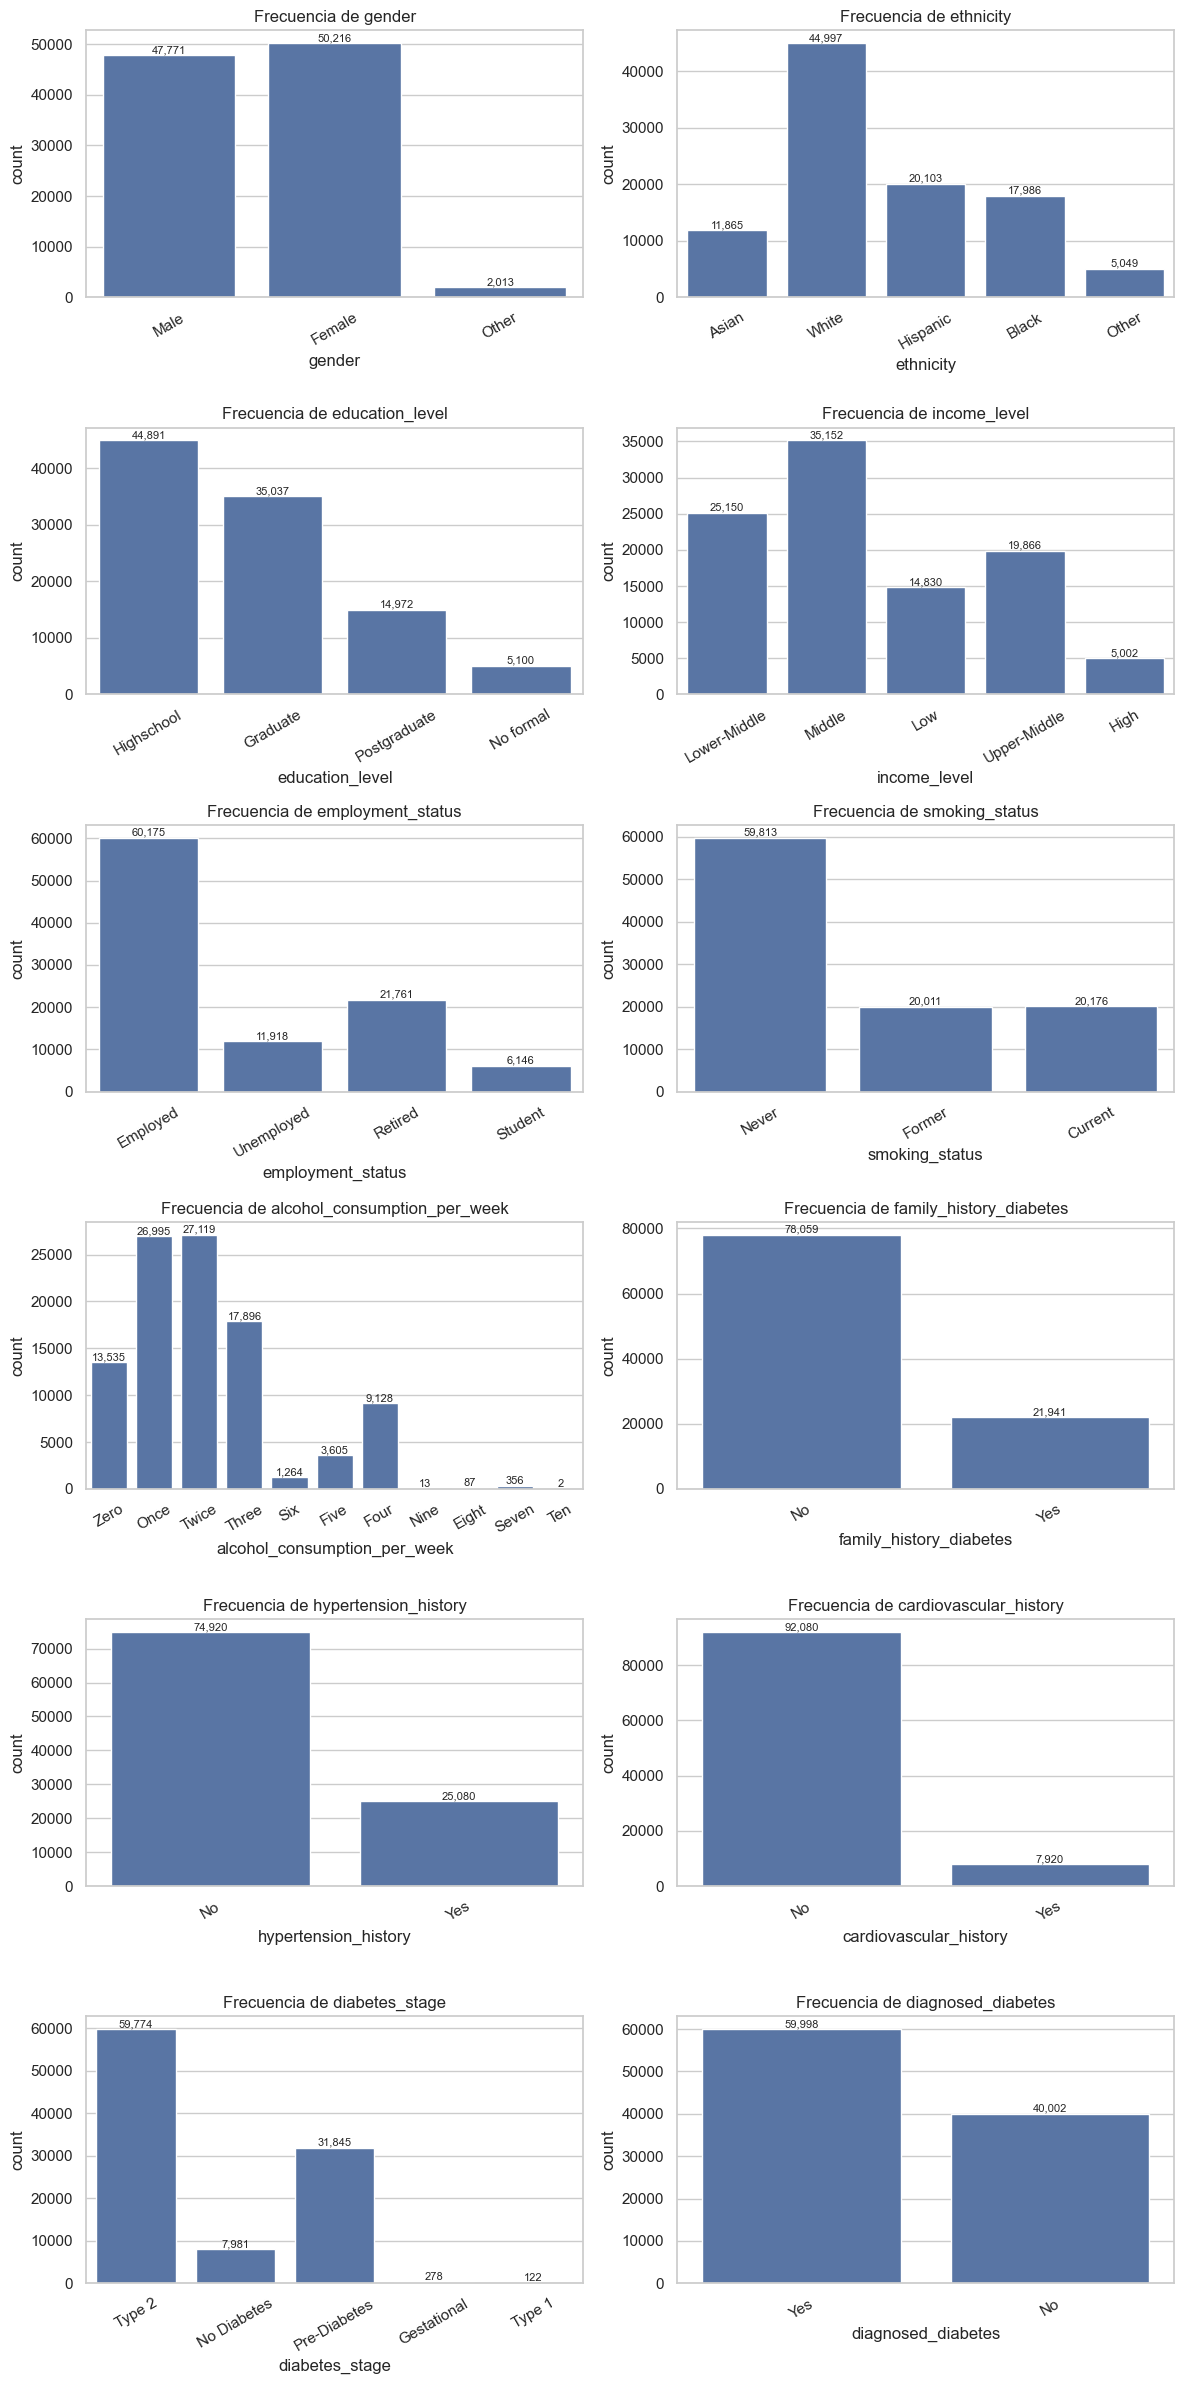

In [28]:
categorical_cols = df.select_dtypes(include=["object"]).columns

n = len(categorical_cols)
cols = 2  
rows = math.ceil(n / cols)

plt.figure(figsize=(12, 4 * rows)) 

for i, col in enumerate(categorical_cols, 1):
    plt.subplot(rows, cols, i)

    ax = sns.countplot(data=df, x=col)

    plt.title(f"Frecuencia de {col}")
    plt.xticks(rotation=30)

    for p in ax.patches:
        height = int(p.get_height())
        ax.text(
            p.get_x() + p.get_width() / 2,
            height,
            f'{height:,}',
            ha='center', va='bottom',
            fontsize=8
        )

    plt.tight_layout()

plt.show()

**Nota:** la muestra del estudio está compuesta por una proporción similar de hombres y mujeres, con un ligero predominio femenino. En términos étnicos, se observa una fuerte concentración de participantes identificados como blancos, seguidos por personas hispanas y negras, mientras que los grupos asiáticos y otras etnias representan una fracción menor. En cuanto al nivel educativo, las categorías más frecuentes corresponden a educación secundaria y educación universitaria, con menos participantes en estudios de posgrado y muy pocos sin educación formal. Del mismo modo, el nivel de ingresos se concentra principalmente en los estratos medio-bajo y medio.

En relación con la situación laboral, la mayor parte de los participantes se encuentra empleada, seguida por personas jubiladas y desempleadas, mientras que los estudiantes representan el grupo menos numeroso. En los hábitos de salud, la mayoría de los individuos reporta no haber fumado nunca, aunque existe un grupo considerable de exfumadores y una proporción reducida de fumadores actuales. El consumo de alcohol semanal también es bajo en general, siendo más frecuentes las categorías de consumo cero, una vez o dos veces por semana, mientras que los niveles altos de consumo son escasos dentro de la muestra.

En cuanto a los antecedentes clínicos, la mayoría de los participantes no presenta historia familiar de diabetes, aunque un grupo relevante sí la reporta. Una situación similar ocurre con la hipertensión: la mayor parte de la muestra no ha sido diagnosticada, pero existe una proporción considerable de casos positivos. Por otro lado, los antecedentes cardiovasculares son poco frecuentes y se presentan únicamente en una pequeña parte de los sujetos. Estos patrones sugieren que, aunque muchos participantes no muestran múltiples comorbilidades, sí existe una presencia significativa de factores de riesgo relevantes.

Finalmente, el estado de la diabetes muestra un predominio claro de casos de diabetes tipo 2, acompañado de un número importante de personas en condición de prediabetes. Los casos de diabetes gestacional y diabetes tipo 1 son muy escasos. Esta tendencia se confirma con la variable de diagnóstico de diabetes, en la cual la mayoría de los participantes informa haber recibido dicho diagnóstico. 

# Exploración de valores nulos

In [19]:
valores_nulos = df.isnull().sum()
valores_nulos

age                                   0
gender                                0
ethnicity                             0
education_level                       0
income_level                          0
employment_status                     0
smoking_status                        0
alcohol_consumption_per_week          0
physical_activity_minutes_per_week    0
diet_score                            0
sleep_hours_per_day                   0
screen_time_hours_per_day             0
family_history_diabetes               0
hypertension_history                  0
cardiovascular_history                0
bmi                                   0
waist_to_hip_ratio                    0
systolic_bp                           0
diastolic_bp                          0
heart_rate                            0
cholesterol_total                     0
hdl_cholesterol                       0
ldl_cholesterol                       0
triglycerides                         0
glucose_fasting                       0


**Nota:** ninguna variable tiene valos faltantes. 

# Balance de clase de la variable objetivo

Valores únicos en la variable objetivo:


diagnosed_diabetes
Yes    59998
No     40002
Name: count, dtype: int64


Proporciones (por clase):


diagnosed_diabetes
Yes    0.6
No     0.4
Name: proportion, dtype: float64

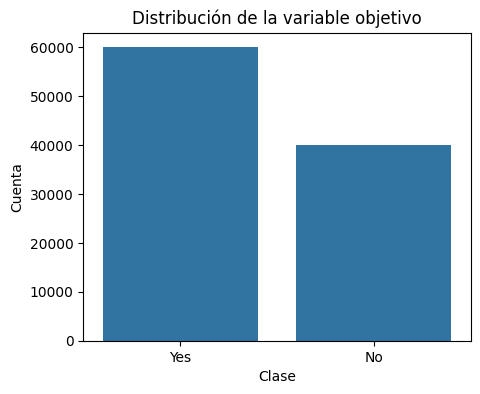

In [21]:
target_col = 'diagnosed_diabetes'

if target_col not in df.columns:
    raise ValueError(f"La columna objetivo '{target_col}' no está en el dataset. Revisa las columnas e identifica cuál es.")

print("Valores únicos en la variable objetivo:")
display(df[target_col].value_counts(dropna=False))

print("\nProporciones (por clase):")
display(df[target_col].value_counts(normalize=True).round(4))

plt.figure(figsize=(5,4))
sns.countplot(x=target_col, data=df)
plt.title('Distribución de la variable objetivo')
plt.xlabel('Clase')
plt.ylabel('Cuenta')
plt.show()

**Nota:** aunque se observa una mayor proporción de personas con diagnóstico de diabetes en comparación con aquellas sin diagnóstico, la diferencia no representa un desbalance de clases significativo.

 # Cardinalidad

In [ ]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()

if cat_cols:
    card = df[cat_cols].nunique().sort_values(ascending=False)
    print("Número de categorías por columna:")
    print(card.to_frame(name='n_unique'))

for col in cat_cols:
    print(f"\n {col} ({df[col].nunique()} categorías):")
    print(df[col].unique())

Número de categorías por columna:
                              n_unique
alcohol_consumption_per_week        11
ethnicity                            5
diabetes_stage                       5
income_level                         5
employment_status                    4
education_level                      4
gender                               3
smoking_status                       3
family_history_diabetes              2
hypertension_history                 2
cardiovascular_history               2
diagnosed_diabetes                   2

🔹 gender (3 categorías):
['Male' 'Female' 'Other']

🔹 ethnicity (5 categorías):
['Asian' 'White' 'Hispanic' 'Black' 'Other']

🔹 education_level (4 categorías):
['Highschool' 'Graduate' 'Postgraduate' 'No formal']

🔹 income_level (5 categorías):
['Lower-Middle' 'Middle' 'Low' 'Upper-Middle' 'High']

🔹 employment_status (4 categorías):
['Employed' 'Unemployed' 'Retired' 'Student']

🔹 smoking_status (3 categorías):
['Never' 'Former' 'Current']

🔹 alcohol_co

# Distribuciones univariadas 

## Histogramas

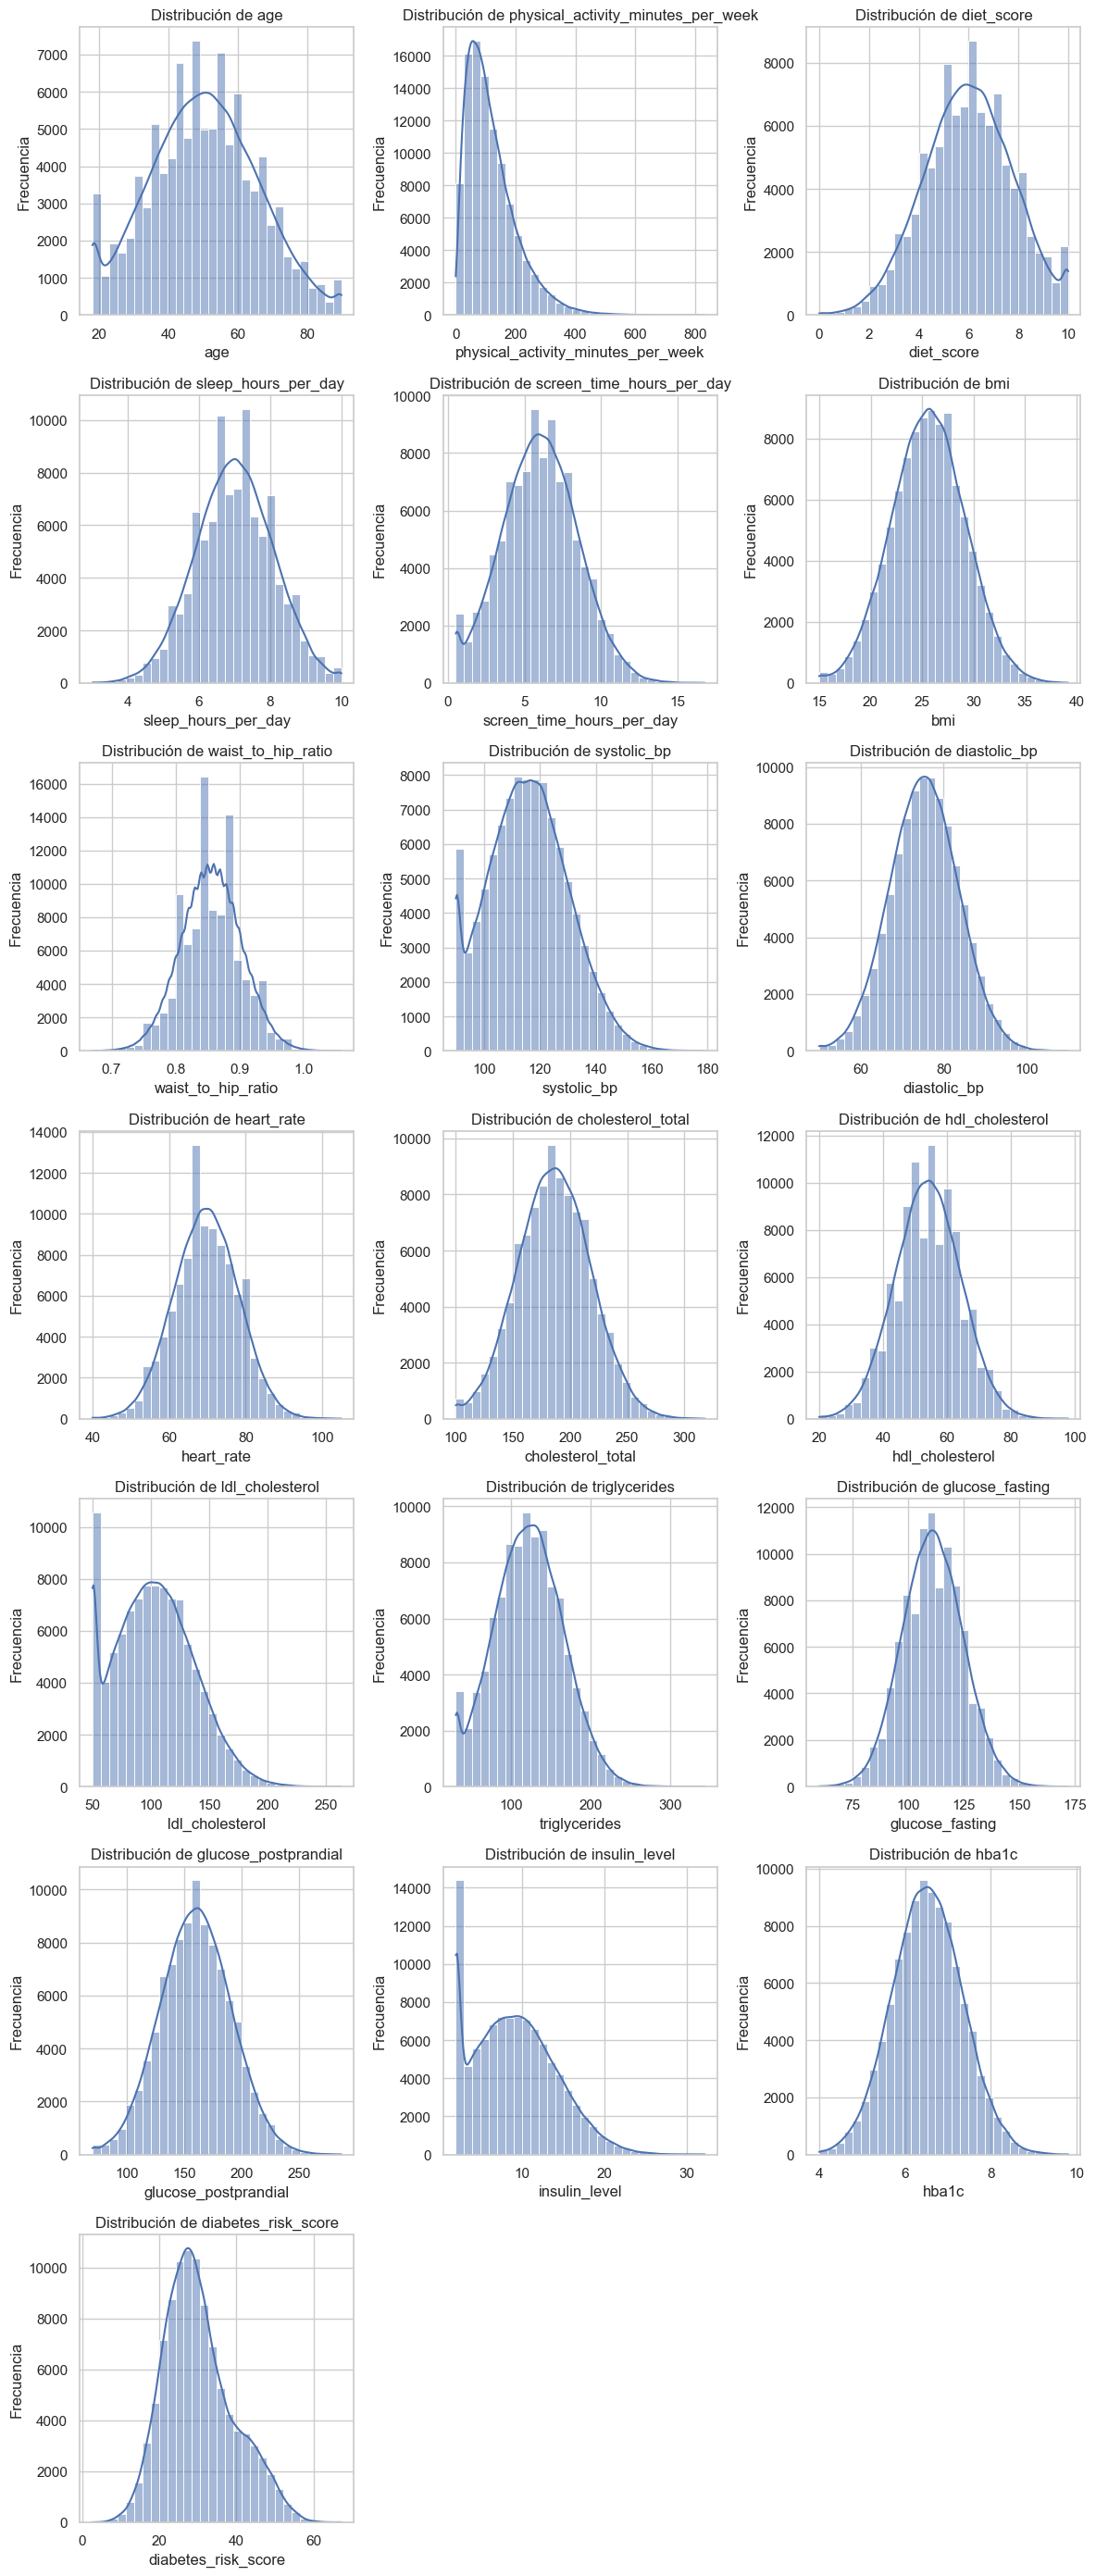

In [26]:
numericas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

sns.set(style="whitegrid")

n = len(numericas)
cols = 3 
rows = math.ceil(n / cols)

plt.figure(figsize=(12, 4 * rows)) 

for i, col in enumerate(numericas, 1):
    plt.subplot(rows, cols, i)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.tight_layout()

plt.show()

**Nota:** en primer lugar, se observan varias variables con distribuciones aproximadamente normales, lo que indica que los valores tienden a concentrarse en torno a un promedio con variaciones regulares. Entre estas variables se encuentran age, sleep_hours_per_day, diet_score, screen_time_hours_per_day, bmi, waist_to_hip_ratio, systolic_bp, diastolic_bp, heart_rate, cholesterol_total, hdl_cholesterol, ldl_cholesterol, glucose_fasting, glucose_postprandial, hba1c y diabetes_risk_score. Estas distribuciones en forma de “campana” sugieren que la mayoría de las personas se concentran cerca del promedio de cada indicador, mientras que los valores extremos son menos frecuentes.

En contraste, algunas variables presentan distribuciones claramente asimétricas hacia la izquierda, lo que significa que la mayoría de los valores son bajos o moderados, pero existe una cola larga hacia valores altos. Este comportamiento se observa en physical_activity_minutes_per_week, triglycerides e insulin_level. Estas distribuciones suelen indicar que un grupo reducido de personas presenta valores inusualmente altos.

Finalmente, variables como screen_time_hours_per_day y bmi muestran una distribución ligeramente desplazada hacia la izquierda. Aunque mantienen cierta forma de campana, lo que indica que aunque la mayoría de valores se agrupan cerca de un rango central, existe una tendencia hacia valores más bajos en una fracción de los sujetos.

## Boxplots

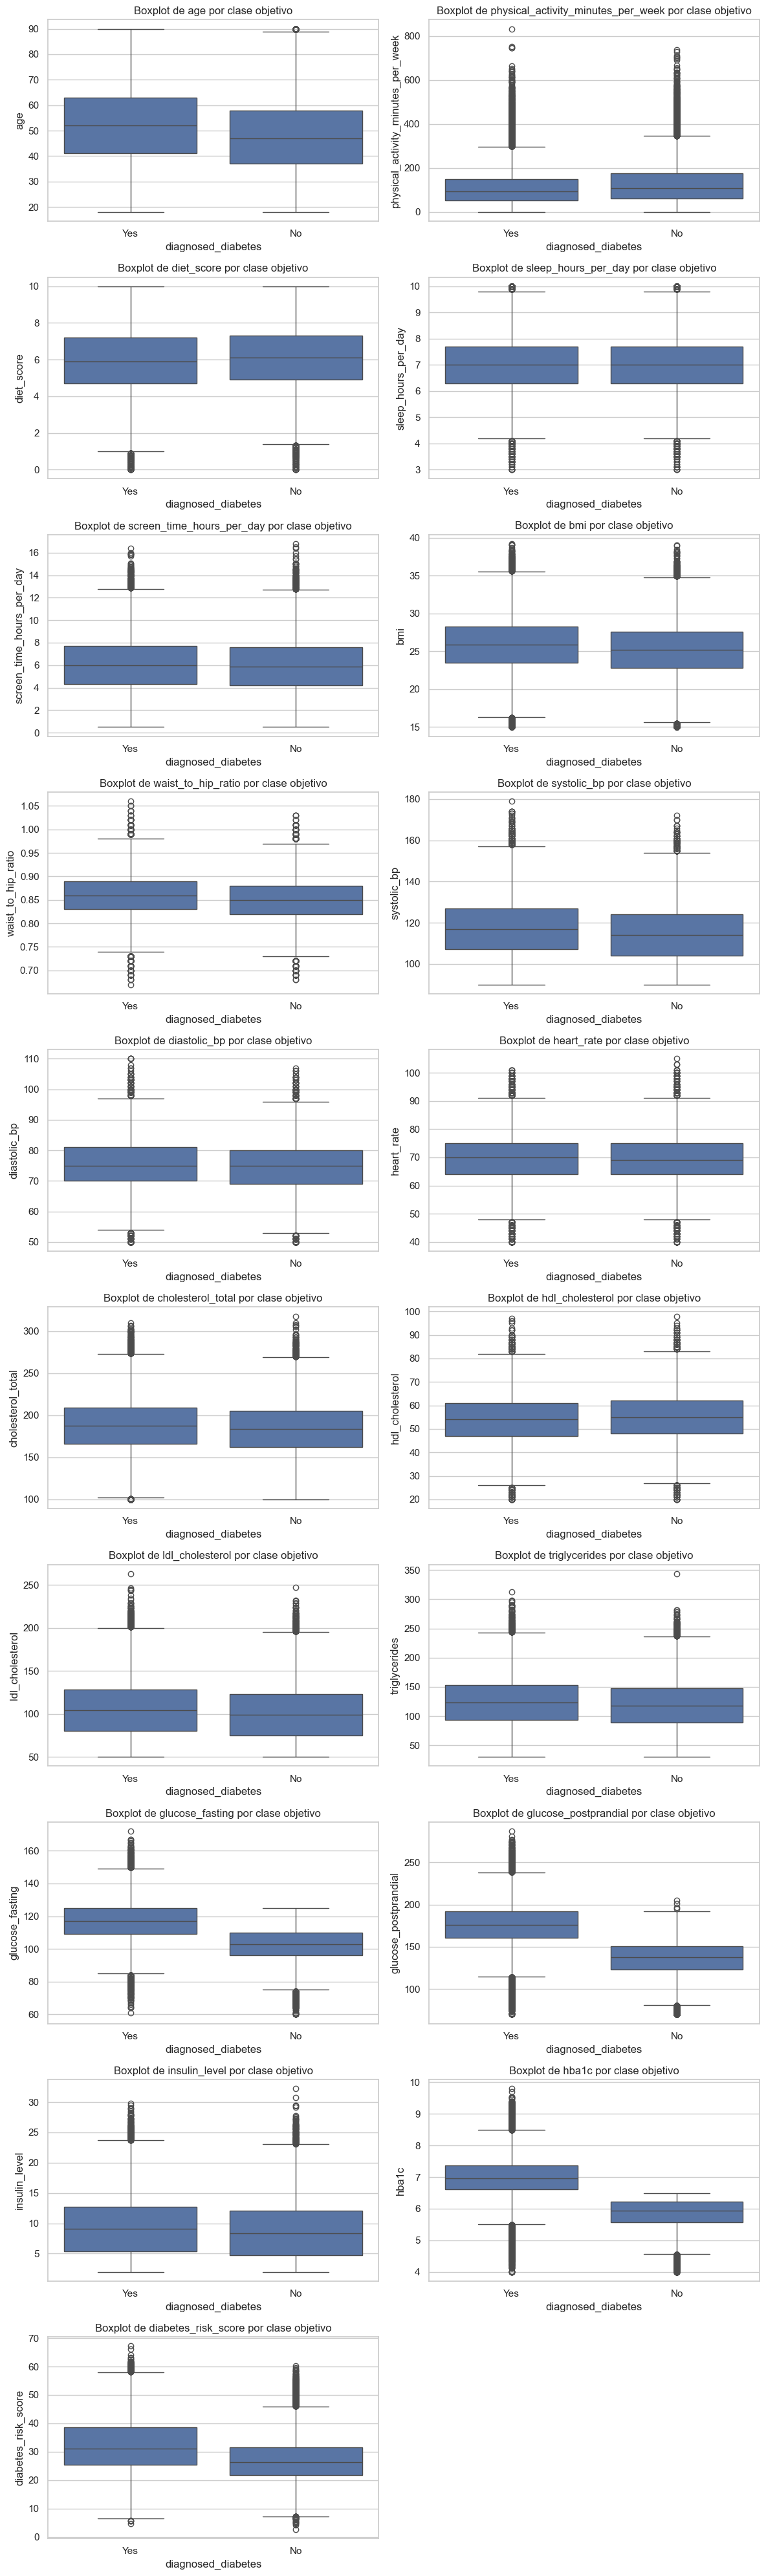

In [27]:
num_cols_filtered = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
target_col = 'diagnosed_diabetes'
num_cols_filtered = [col for col in num_cols_filtered if col != target_col]

n = len(num_cols_filtered)
cols = 2  
rows = math.ceil(n / cols)

plt.figure(figsize=(12, 4 * rows))  

for i, col in enumerate(num_cols_filtered, 1):
    plt.subplot(rows, cols, i)
    sns.boxplot(x=target_col, y=col, data=df)
    plt.title(f'Boxplot de {col} por clase objetivo')
    plt.xlabel(target_col)
    plt.ylabel(col)
    plt.tight_layout()

plt.show()

**Nota:** en los boxplots de hba1c, glucose_postprandial y glucose_fasting, se observa una separación muy clara en las distribuciones de valores entre las dos clases de la variable objetivo. Los pacientes con diagnóstico de diabetes tienden a presentar valores notablemente más altos y con una distribución diferente a los que no tienen el diagnóstico.

Por otra parte, se observa que en la mayoría de las variables existen datos atípicos. 

# Correlaciones de Pearson (relaciones lineales)

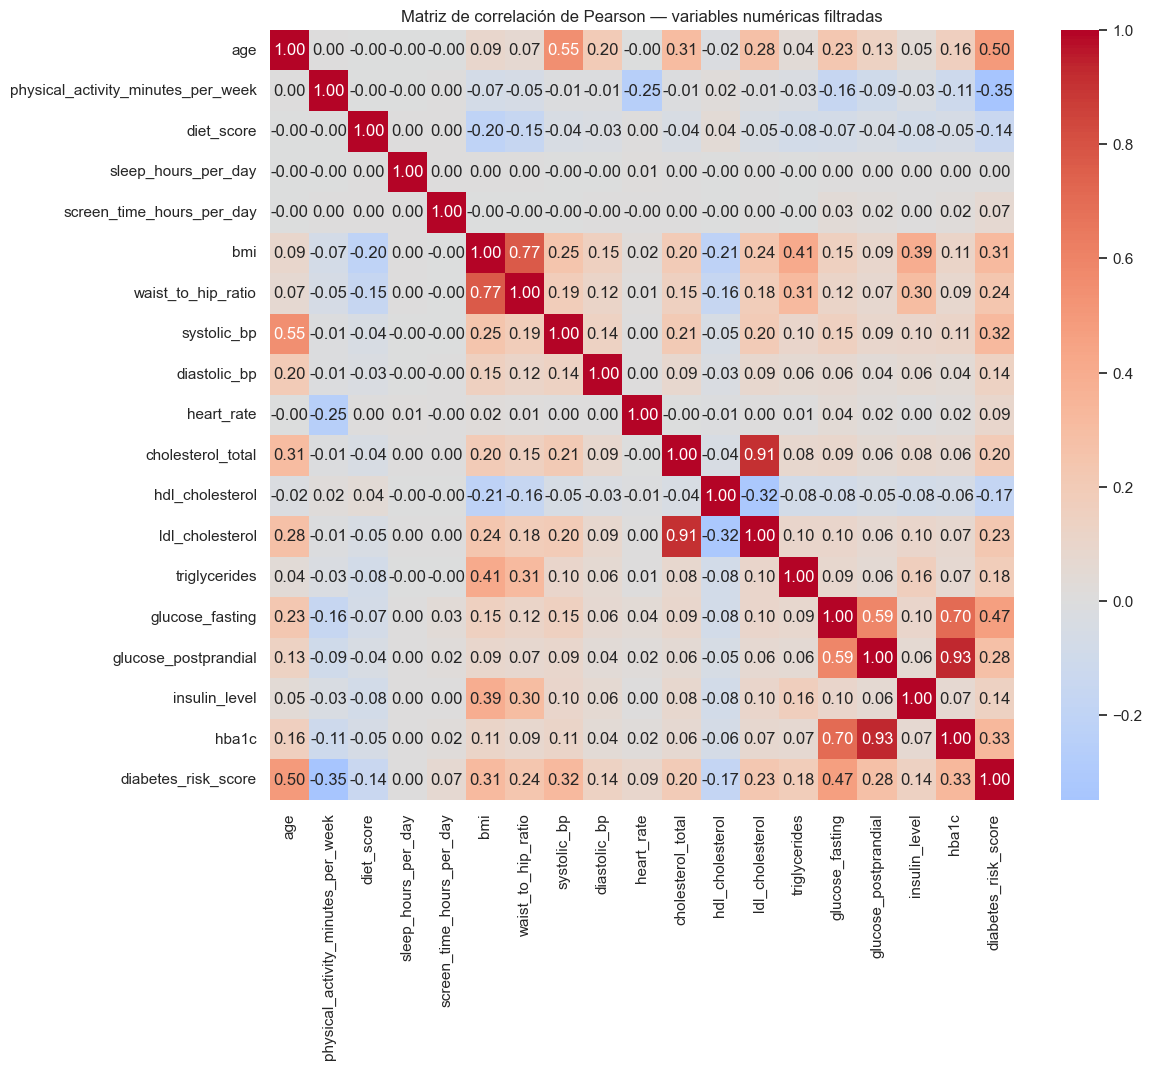

In [29]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

corr_pearson = df[num_cols].corr(method='pearson')

plt.figure(figsize=(12, 10))
sns.heatmap(corr_pearson, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Matriz de correlación de Pearson — variables numéricas filtradas')
plt.show()

# Correlaciones de Spearman (relaciones no lineales)

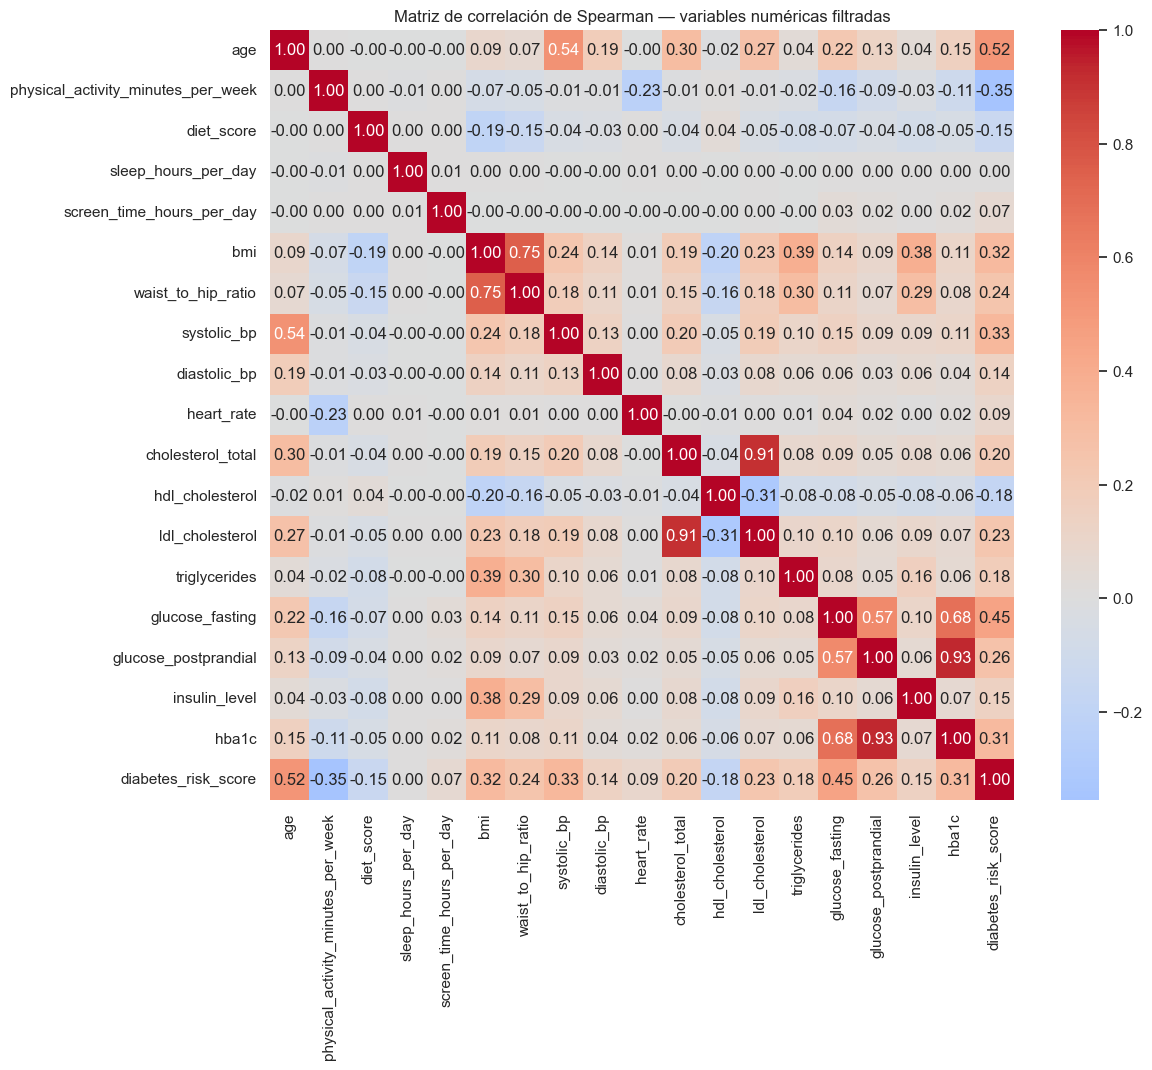

In [30]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

corr_spearman = df[num_cols].corr(method='spearman')

plt.figure(figsize=(12, 10))
sns.heatmap(corr_spearman, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Matriz de correlación de Spearman — variables numéricas filtradas')
plt.show()

**Nota:** las matrices de correlación de Pearson y Spearman muestran, respectivamente, las relaciones lineales y monotónicas entre las variables numéricas del dataset. En ambas se observan correlaciones muy altas entre ldl_cholesterol y cholesterol_total (0.91) y entre glucose_postprandial y hba1c (0.93), lo que refleja que el LDL constituye un componente principal del colesterol total y que los niveles de glucosa posprandial están estrechamente relacionados con el control glucémico a largo plazo. También destacan las asociaciones entre bmi y waist_to_hip_ratio (0.77, 0.75), indicando que un mayor índice de masa corporal se asocia con mayor acumulación de grasa abdominal.

Entre las correlaciones moderadas, age se relaciona con systolic_bp (0.55, 0.54), mostrando que la presión arterial tiende a incrementarse con la edad. Asimismo, diabetes_risk_score se asocia positivamente con age (0.50, 0.52) y negativamente con physical_activity_minutes_per_week (-0.35, -0.35), evidenciando que una mayor edad y menor actividad física se relacionan con un mayor riesgo de diabetes. Además, glucose_fasting se correlaciona con hba1c (0.70, 0.68) y con diabetes_risk_score (0.47, 0.45), lo que subraya la relevancia de la glucosa en ayunas como indicador de riesgo metabólico. También se observa una correlación moderada entre glucose_postprandial y glucose_fasting (0.57, 0.55), lo que indica que las personas con niveles elevados de glucosa en ayunas tienden a mantener valores altos después de las comidas, aunque ambas medidas reflejan aspectos distintos del metabolismo glucémico. Por su parte, bmi y triglycerides (0.41, 0.39) muestran que un mayor peso corporal se asocia con concentraciones más altas de triglicéridos.

Las correlaciones bajas, cercanas a cero, reflejan relaciones débiles o inexistentes entre algunas variables cardiovasculares y metabólicas, mientras que las negativas sugieren posibles factores protectores, como la actividad física frente al riesgo de diabetes (-0.35) y frente a la frecuencia cardíaca (-0.25, -0.23), o una dieta más saludable asociada con mejores indicadores metabólicos. 

En coonclusión, ambas matrices permiten identificar agrupamientos de variables interrelacionadas (como glucosa y HbA1c, el perfil lipídico y las medidas antropométricas) y sugieren que algunas variables altamente correlacionadas podrían ser redundantes o reflejar dimensiones similares en modelos predictivos.

# Resumen ligero de hallazgos y orientaciones

**Dimensiones del dataset:** 100,000 filas x 30 columnas.
**Variable objetivo:** diagnosed_diabetes. 

**Distribución de clases:** con diabetes = 60% ; sin diabetes = 40%. No se observa un desbalance de clases significativo.

**Variables a conservar y eliminar:** con el propósito de predecir la variable diagnosed_diabetes, se optó por utilizar la mayoría de las variables disponibles como posibles predictores, eliminando únicamente aquellas que podrían generar redundancia o problemas estadísticos. En primer lugar, diabetes_stage se excluirá por ser redundante con la variable objetivo, ya que describe el tipo de diabetes y no aporta información adicional para determinar su presencia o ausencia. En segundo lugar, cholesterol_total y glucose_postprandial mostraron una alta correlación lineal con otras variables (ldl_cholesterol y hba1c, respectivamente), lo que podría ocasionar problemas de multicolinealidad en modelos lineales, como la regresión logística, afectando la estimación de los coeficientes y la interpretación del modelo. Por ello, se conservarán únicamente las variables más representativas de cada par (ldl_cholesterol y hba1c), asegurando la preservación de la información clínica y predictiva sin redundancias.

**Valores faltantes:** el dataset no presenta valores faltantes en ninguna de sus columnas